In [15]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#reading in the file
df = pd.read_csv('hotel_bookings.csv', na_values=[' ', '-', 'Undefined', 'None'])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
#converting the 'is_cancled' column to Boolean
df.is_canceled = df.is_canceled.astype(bool)

In [5]:
#converting the 'is_repeated_guest' column to Boolean
df.is_repeated_guest = df.is_repeated_guest.astype(bool)

In [6]:
# converting 'reservation_type_date' column to datetime types
df.reservation_status_date = pd.to_datetime(df.reservation_status_date)

In [8]:
# concatenating day, month and year columns into one
cols = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
df['arrival_date'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
# converting 'arrival_date' column to datetime object
df.arrival_date =  pd.to_datetime(df.arrival_date, format='%Y_%B_%d')
# dropping the cols
df = df.drop(columns=cols)

In [10]:
# df['direct_booking'] = df[['agent', 'company']].isna().any(axis=1, skipna=False)
# df.loc[:,'agent':'direct_booking']
# lambda row:
# cols = df['agent', 'company']
df['direct_booking'] = df.apply(lambda row:False if row['agent'] > 0 else(False if  row['company'] > 0 else True),axis=1)

# def new_col_from_yes_no_in_other_cols(df, new_col, col1, col2):
#     df[new_col] = df.apply(lambda row: 'No' if row.col1 > 0
#     else ('No' if row.col2 > 0 else 'Yes'),axis=1)
# for each in df.head().iterrows():
#     print(each)
#     if each['agent'].isna() and each['company'].isna:
#         each['direct_booking'] = True
#     else:
#         each['direct_booking'] = False

In [13]:
df.direct_booking.value_counts()

False    109630
True       9760
Name: direct_booking, dtype: int64

In [9]:
df.arrival_date

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

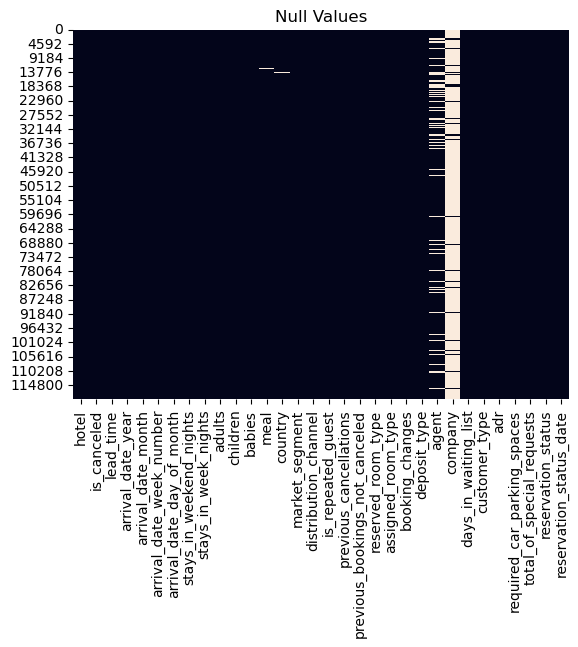

In [22]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values')
plt.show()

In [24]:
df.meal.value_counts(dropna=False)

BB     92310
HB     14463
SC     10650
NaN     1169
FB       798
Name: meal, dtype: int64

In [28]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                1169
country                              488
market_segment                         2
distribution_channel                   5
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [38]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [ ]:
df = df.drop(columns=['agent','company'])


In [41]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [42]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.
